In [1]:
import pandas as pd
import os
from tqdm import tqdm

VL_REPASSE = valor total do financiamento repassado à mantenedora
NU_PERCENT_SOLICITADO_FINANC = percentual de financiamento solicitado pelo estudante
CO_IES = código da IES
NO_IES = nome da IES
NU_ANO = ano de referencia do contrato
NU_MES = mes de referencia do contrato
NU_SEMESTRE = semestre de referencia do contrato
DS_RACA_COR = raça/cor do estudante
DS_CURSO = descrição do curso
SG_SEXO = sexo do estudante

In [8]:
folder = "./data/fies/"
files = os.listdir(folder)

df_final = pd.DataFrame()

for filename in tqdm(files):
    df = pd.read_csv(
        f"{folder}/{filename}",
        sep=";",
        encoding="latin1",
        decimal=",",
    )

    df_g = (
        df.groupby(
            [
                "CO_MANTENEDORA",
                "NU_CNPJ_MANTENEDORA",
                "NO_RAZAO_SOCIAL_MANTENEDORA",
                "CO_IES",
                "NO_IES",
                "NU_ANO",
            ]
        )
        .agg({"VL_REPASSE": "sum", "CO_CONTRATO_FIES": "count"})
        .sort_values("VL_REPASSE", ascending=False)
        .reset_index()
        .rename(
            {"VL_REPASSE": "tot_repasse", "CO_CONTRATO_FIES": "tot_alunos"},
            axis=1,
        )
    )

    df_final = pd.concat([df_final, df_g])

# por alguma razão o agrupamento repete valores, acredido que haja de dados de anos diferentes nos arquivos...
df_final = (
    df_final.groupby(
        [
            "CO_MANTENEDORA",
            "NU_CNPJ_MANTENEDORA",
            "NO_RAZAO_SOCIAL_MANTENEDORA",
            "CO_IES",
            "NO_IES",
            "NU_ANO",
        ]
    )
    .agg({"tot_repasse": "sum", "tot_alunos": "sum"})
    .sort_values("tot_repasse", ascending=False)
    .reset_index()
)

 75%|███████▌  | 6/8 [05:33<02:29, 74.79s/it]C:\Users\caca_\AppData\Local\Temp\ipykernel_11108\3619938073.py:7: DtypeWarning: Columns (7,20,25,26,27,29,30,32,33,34,38,40,46,48,50) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(
100%|██████████| 8/8 [07:03<00:00, 52.98s/it]


<Axes: xlabel='NU_ANO'>

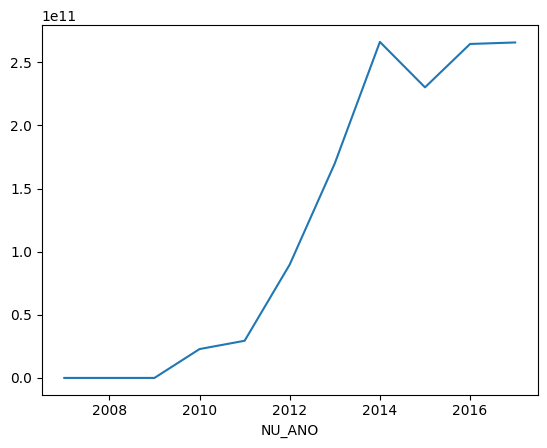

In [10]:
df_final.groupby('NU_ANO').sum(numeric_only=True)['tot_repasse'].plot()

In [7]:
df_final.to_excel('dados_fies_por_IES.xlsx', index=False)